# Linear Regression

---

In [1]:
!pip install numpy

In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
!pip install seaborn

## 2. Import the required libraries

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## 3. Load Data

In [6]:
# Load data
train_data = pd.read_csv('data/myfileCleaned.csv')
# Separate features and target variable
#X_train = train_data.drop(['SalePrice'], axis=1)
y = train_data['y']

In [7]:
train_data

,x,y,x2,x3,x4,G_F,G_M
0,400.0,1220.253196,6710.023723,-79427.003082,-4021.199462,True,False
1,401.0,1223.000748,4304.634351,45768.892513,15361.328422,True,False
2,402.0,1226.373344,-21070.297460,-32163.825243,47041.438421,True,False
3,403.0,1228.472848,5994.735403,-79510.499359,19623.065340,True,False
4,404.0,1231.728254,-2143.978443,54671.669602,-2219.846433,True,False
...,...,...,...,...,...,...,...
1197,996.0,2998.083156,11051.635639,47019.829206,6238.707096,False,True
1198,997.0,3000.995219,-1152.332640,-22357.353789,22851.329598,False,True
1199,998.0,3004.019960,-1115.006412,-38096.648784,-55434.725806,False,True
1200,999.0,3007.099134,-8576.809778,-35320.710806,36364.273902,False,True


## 6. Linear Regression
**Preparing Some tools :**

**Evaluate the model using Most Common Regression metrics :**

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

**Mean Absolute Error (MAE) :** 
\begin{align*} 
MAE = \frac{1}{n} \Sigma_{i=1}^n |{y}-\hat{y}|
\end{align*}


**Residual Sum of Squares (RSS) :** 

\begin{align*} 
 RSS = \Sigma_{i=1}^n({y}-\hat{y})^2
\end{align*}

**Mean Squared Error (MSE) :** 
\begin{align*} 
  MSE = \frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2
\end{align*}


**Root Mean Squared Error (RMSE) :** 
\begin{align*} 
  RMSE = \sqrt {\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2 }
\end{align*}


* Comparing these metrics :
    * **MAE** is the easiest to understand, because it is the average error
    * **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world
    * **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units
* All of these are **loss functions**, because we want to minimize them

**R^2 :** 
* aka : coefficient of determination
* if the model is only prdicting the mean of the targets, R^2 value would be 0
  ==> model is poor
* if the model is perfectly predicting the targets, R^2 value would be 1

In [8]:
!pip install scikit-learn

In [9]:
# Create evaluation functions 
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

# Create function to get metrics from predicted values vs true values
def get_scores(predictions, y):
    """
    Caculates between predictions and true labels: 
        - mae,
        - mse,
        - rmse
        - r2
    """
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = explained_variance_score(y, predictions)
    scores = {"MAE": mae,
              "MSE": mse,
              "RMSE": rmse,
              "R2": r2
              }
    return scores

def show_scores(scores):
    """
    Shows metrics: 
        - mae,
        - mse,
        - rmse
        - r2
    """
    print(f"\tR^2 : {scores['R2']:.2f}")
    print(f"\tMAE : {scores['MAE']:.2f}")
    print(f"\tMSE : {scores['MSE']:.2f}")
    print(f"\tRMSE : {scores['RMSE']:.2f}")
    print('')

def show_scores_data_frame(scores, col_name):
    """
    Shows metrics in a data frame: 
        - mae,
        - mse,
        - rmse
        - r2
    """
    df = pd.DataFrame(scores.values(), scores.keys(), columns=[col_name])
    print(df)

def show_intercept_coefs(lr, cols):
    print(f"Intercept b_0 : {lr.intercept_}")
    print('')
    cdf = pd.DataFrame(lr.coef_, cols, columns=['Coefficient'])
    cdf = cdf.sort_values(by=['Coefficient'], ascending=False)
    print(cdf)   

In [10]:
train_data_encoded = train_data

## 8. Modeling (II)

**Multiple Linear Regression :**
* Trying to find the `coefficient` and the `slope` for :
\begin{align*}
\hat{y} = b_0 + b_1{x}_{1} + b_2{x}_{2} + ... + b_n{x}_{n}\\
\end{align*}

In [11]:
train_data_encoded.shape

(1202, 7)

In [12]:
X = pd.DataFrame(train_data_encoded[['x', 'x2', 'x3', 'x4', 'G_F']])
y = train_data_encoded['y']
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

**Making Predictions on `X_train` and `X_val` : **

In [14]:
train_predictions = lr.predict(X_train)
val_predictions = lr.predict(X_val)

train_scores = get_scores(train_predictions, y_train)
val_scores = get_scores(val_predictions, y_val)

print('')
#print(f"Training :")
#show_scores(train_scores)
show_scores_data_frame(train_scores, 'Training')
print('')
#print(f"Validation :")
#show_scores(val_scores)
show_scores_data_frame(val_scores, 'Validation')
#
print('')

show_intercept_coefs(lr, X_train.columns)


      Training
MAE   0.241445
MSE   0.091607
RMSE  0.302666
R2    1.000000

      Validation
MAE     0.245643
MSE     0.092286
RMSE    0.303785
R2      1.000000

Intercept b_0 : 9.976461405783084

      Coefficient
G_F  1.000393e+01
x    3.000040e+00
x4   1.068879e-07
x3   6.276363e-09
x2  -1.034246e-06


* Trying to find the `coefficient` and the `slope` for :
\begin{align*}
\hat{y} = b_0 + b_1{x}_{1} + b_2{x}_{2} + ... + b_n{x}_{n}\\
\end{align*}

  $$\hat{y} = 9.97 + 3.00 * {x}_{1} + -1.03e-06 * {x}_{2} + 6.27e-09 * {x}_{3} + 1.06e-07 * {x}_{4}$$

**R^2 (default score): Each model has a default metric set up by default :**

In [15]:
r_2_on_train = lr.score(X_train, y_train) 
print(f"R^2 on Training data = {r_2_on_train}")
r_2_on_val = lr.score(X_val, y_val) 
print(f"R^2 on Validation data = {r_2_on_val}")

R^2 on Training data = 0.9999996709349336
R^2 on Validation data = 0.9999996168514967


**Plot Predicted values vs True Values :**

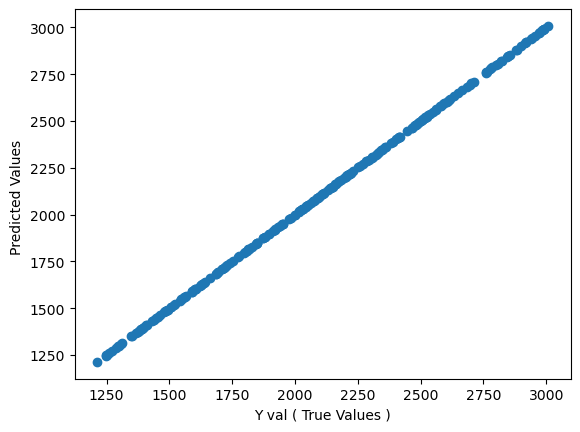

In [16]:
plt.scatter(y_val, val_predictions)
plt.xlabel('Y val ( True Values )')
plt.ylabel('Predicted Values ')
plt.show()

In [17]:
# Example of predicting a single value using a new data point
new_data = np.array([[20, 2222222, 3333333, 4444444, 1]]) 
single_prediction = lr.predict(new_data)
print(f"Predicted value for the new data point {new_data[0]}: {single_prediction[0]}")

Predicted value for the new data point [     20 2222222 3333333 4444444       1]: 78.1788486840207


/home/aaiche/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Saving and Loading Models in Scikit-learn :**
- Scikit-learn supports the Python packages :
  * `Pickle` ( not covered in student guide )
  * `Joblib`

In [18]:
import joblib 

# save model with joblib 
filename = 'models/lr2.joblib'
joblib.dump(lr, filename)

['models/lr2.joblib']

In [19]:
# load model with joblib
loaded_model = joblib.load(filename)

In [20]:
# Example of predicting a single value using a new data point
new_data = np.array([[20, 2222222, 3333333, 4444444, 1]]) 
single_prediction = loaded_model.predict(new_data)
print(f"Predicted value for the new data point {new_data[0]}: {single_prediction[0]}")

Predicted value for the new data point [     20 2222222 3333333 4444444       1]: 78.1788486840207


/home/aaiche/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Convert the Scikit-learn model to ONNX and save :**

In [21]:
#TBD